In [35]:
from spso2006 import Spso,eggHolder,rosen
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Eggholder function

In [36]:
nbRepet = 20
n = 20
nbEpoch=120
acceptableFitness = -959.6407


In [29]:
data_k_i = []
for n in [5,10,20,30]:
    for k in [2,3,4,5]:
        for i in range(nbRepet):
            pso = Spso(n,k=k,nbEvaluationMax=nbEpoch,acceptableFitness=acceptableFitness)
            pso.mainLoop()
            fit = pso.epochSummary['fitness']
            topo = pso.epochSummary['topology']
            indivs = pso.epochSummary['bestX']
            for epoch in range(len(fit)):
                x = indivs[epoch]
                data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['x'],x['y'],x['z'],x['a'],x['b']])
    k = 10000
    for i in range(nbRepet):
        pso = Spso(n,k=k,nbEvaluationMax=nbEpoch,wl=0,wg=1,acceptableFitness=acceptableFitness)
        pso.mainLoop()
        fit = pso.epochSummary['fitness']
        indivs = pso.epochSummary['bestX']
        for epoch in range(len(fit)):
            x = indivs[epoch]
            data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['x'],x['y'],x['z'],x['a'],x['b']])
        


Process Worker-158437:
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 257, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.4/multiprocessing/util.py", line 286, in _exit_function
    _run_finalizers(0)
  File "/usr/lib/python3.4/multiprocessing/util.py", line 252, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.4/multiprocessing/util.py", line 185, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/queues.py", line 204, in _finalize_close
    notempty.acquire()
KeyboardInterrupt


KeyboardInterrupt: 

In [4]:
data =pd.DataFrame(data_k_i,columns=['n','k','i','epoch','f','topo','x','y','z','a','b'])


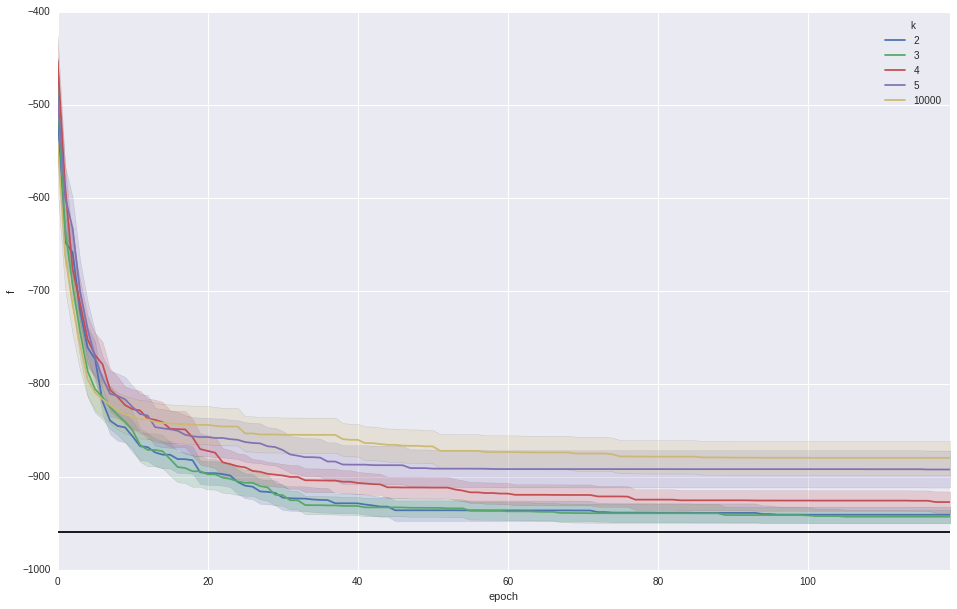

In [5]:
plt.figure(figsize=(16,10))
sns.tsplot(time='epoch',value='f',unit='i',condition='k',data=data[data.n==20])
plt.hlines(acceptableFitness,0,nbEpoch)

# Test multithread

In [60]:
nbRepet = 1
n = 20
nbEpoch=120
acceptableFitness = -959.6407
nbThread=8
function = eggHolder


In [62]:
data_k_i = []
for n in [20,]:
    print("n",n)
    k = 3
    for i in range(nbRepet):
        print("i",i)
        pso = Spso(n,k=k,nbEvaluationMax=nbEpoch,acceptableFitness=acceptableFitness,
                   nbThread=nbThread,evaluationFunc=eggHolder)
        pso.mainLoop()
        fit = pso.epochSummary['fitness']
        topo = pso.epochSummary['topology']
        indivs = pso.epochSummary['bestX']
        for epoch in range(len(fit)):
            x = indivs[epoch]
            data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['x'],x['y'],x['z'],x['a'],x['b']])
#     k = 10000
#     for i in range(nbRepet):
#         pso = Spso(n,k=k,nbEvaluationMax=nbEpoch,wl=0,wg=1,acceptableFitness=acceptableFitness,
#                    nbThread=nbThread,evaluationFunc=eggHolder)
#         pso.mainLoop()
#         fit = pso.epochSummary['fitness']
#         indivs = pso.epochSummary['bestX']
#         for epoch in range(len(fit)):
#             x = indivs[epoch]
#             data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['x'],x['y'],x['z'],x['a'],x['b']])
        


n 20
i 0
best Fitness  0 217.627802413
bestF : 217.62780241254634
bestX : {'b': -17.202300739662025, 'x': 398.73487869600922, 'a': 0.32790904944221211, 'z': -0.10390187421825914, 'y': -219.93274581933838}
best Fitness  2 -10.9344611516
bestF : -10.934461151556917
bestX : {'b': 12.499748602438821, 'x': -214.84204740407779, 'a': -12.549895256797615, 'z': 16.434265881454884, 'y': -445.0947285774073}
best Fitness  5 -211.654678663
bestF : -211.65467866346935
bestX : {'b': -12.321760343852457, 'x': 464.19279213676339, 'a': -16.770461457899888, 'z': 11.421579430050723, 'y': 404.77934942511536}
best Fitness  7 -233.780797867
bestF : -233.78079786749825
bestX : {'b': 8.908762384513814, 'x': 198.61580721284849, 'a': 9.6677190823688264, 'z': -0.33334894761712164, 'y': 214.15021959948217}
best Fitness  18 -367.789963407
bestF : -367.78996340680783
bestX : {'b': -0.5885312999212573, 'x': 179.67687297822454, 'a': -0.62221415543178082, 'z': 11.791295345577172, 'y': 298.725536851431}


In [63]:
data =pd.DataFrame(data_k_i,columns=['n','k','i','epoch','f','topo','x','y','z','a','b'])

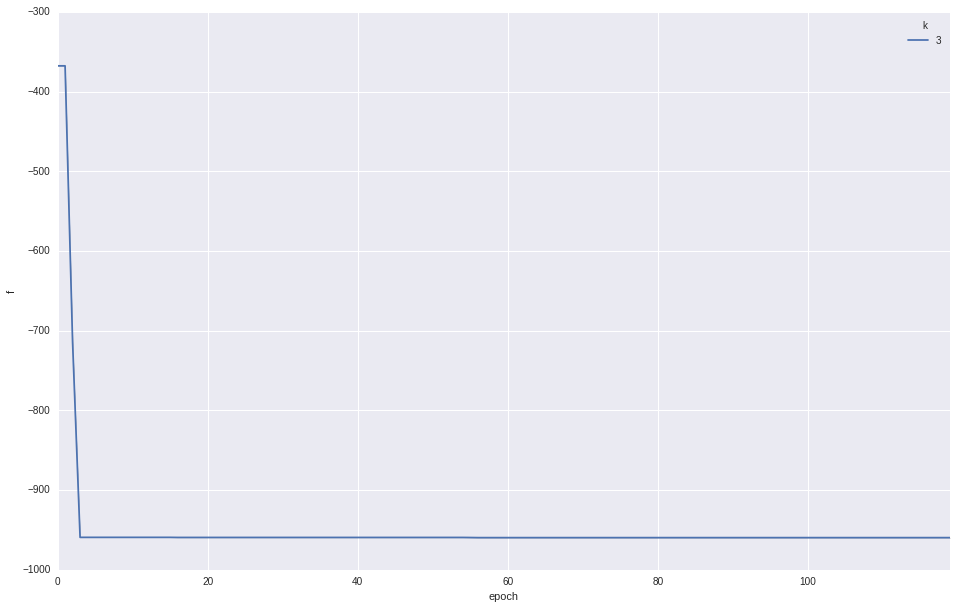

In [66]:
plt.figure(figsize=(16,10))
#sns.tsplot(time='epoch',value='topo',unit='i',condition='k',data=data[data.n==20])
sns.tsplot(time='epoch',value='f',unit='i',condition='k',data=data[data.n==20])
#plt.hlines(acceptableFitness,0,nbEpoch)

In [67]:
log = pso.log

In [68]:
f = np.array(log['f'])
p = np.array(log['p'])
x = np.array(log['x'])
v = np.array(log['v'])

fp = np.array(log['fp'])

l = np.array(log['l'])


lp = np.zeros_like(x)
for i in range(120):
    for j in range(20):
        lp[i,j,:] = p[i,l[i,j],:]

-959.640662614


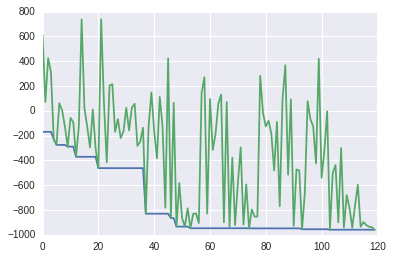

In [69]:
indiv = 10
plt.plot(fp[:,indiv])
plt.plot(f[:,indiv])
print(np.min(fp))

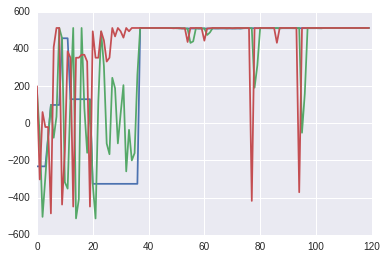

In [72]:
indiv = 10
dim = 0
plt.plot(p[:,indiv,dim])
plt.plot(x[:,indiv,dim])
plt.plot(lp[:,indiv,dim])